In [1]:
import sys
sys.path.insert(0, "../")
from src.data.data_functions.hdf5_utils import unpack_hdf5
import statsmodels.api as sm

In [2]:
before = '../data/raw/AutoPi_CAN/platoon_CPH1_HH.hdf5'
after = "../data/interim/gm/converted_platoon_CPH1_HH.hdf5"
autopi_before = unpack_hdf5(before)
autopi_after = unpack_hdf5(after)

In [3]:
x_data_before = autopi_before['GM']['16006']['pass_1']['acc.xyz'][:, 1]
x_data_after = autopi_after['GM']['16006']['pass_1']['acc.xyz'][:, 1]

y_data_before = autopi_before['GM']['16006']['pass_1']['acc.xyz'][:, 2]
y_data_after = autopi_after['GM']['16006']['pass_1']['acc.xyz'][:, 2]

z_data_before = autopi_before['GM']['16006']['pass_1']['acc.xyz'][:, 3]
z_data_after = autopi_after['GM']['16006']['pass_1']['acc.xyz'][:, 3]

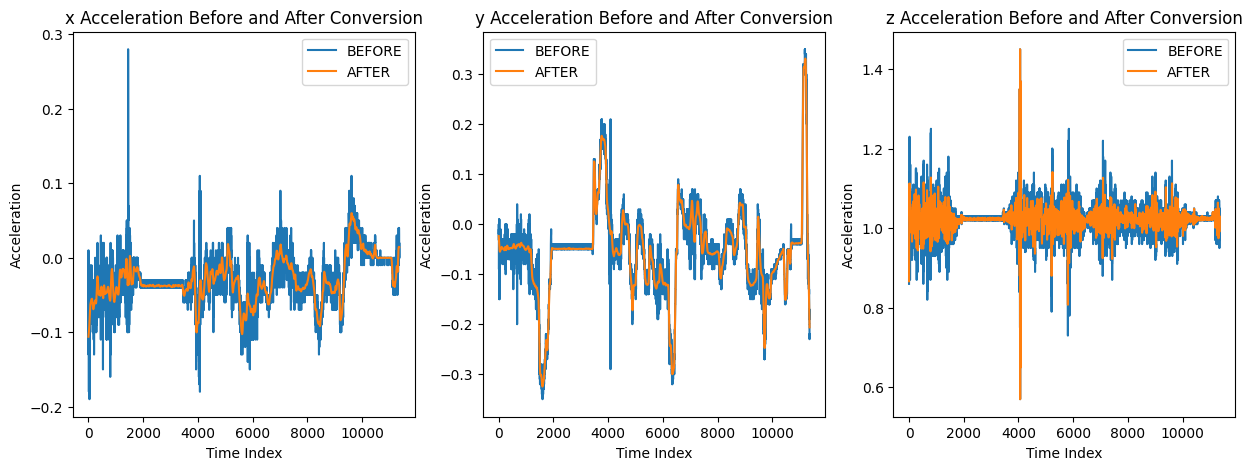

In [4]:
import matplotlib.pyplot as plt

x = range(len(x_data_before))
fig, ax = plt.subplots(1,3, figsize=(15, 5))
data_before = [x_data_before, y_data_before, z_data_before]
data_after = [x_data_after, y_data_after, z_data_after]
titles = [f"x Acceleration Before and After Conversion",f"y Acceleration Before and After Conversion",f"z Acceleration Before and After Conversion"]
for i in range(3):
    ax[i].plot(x, data_before[i], label='BEFORE')
    ax[i].plot(x, data_after[i], label='AFTER')
    ax[i].set_xlabel("Time Index")
    ax[i].set_ylabel("Acceleration")
    ax[i].legend()
    ax[i].set_title(titles[i])
plt.show()  

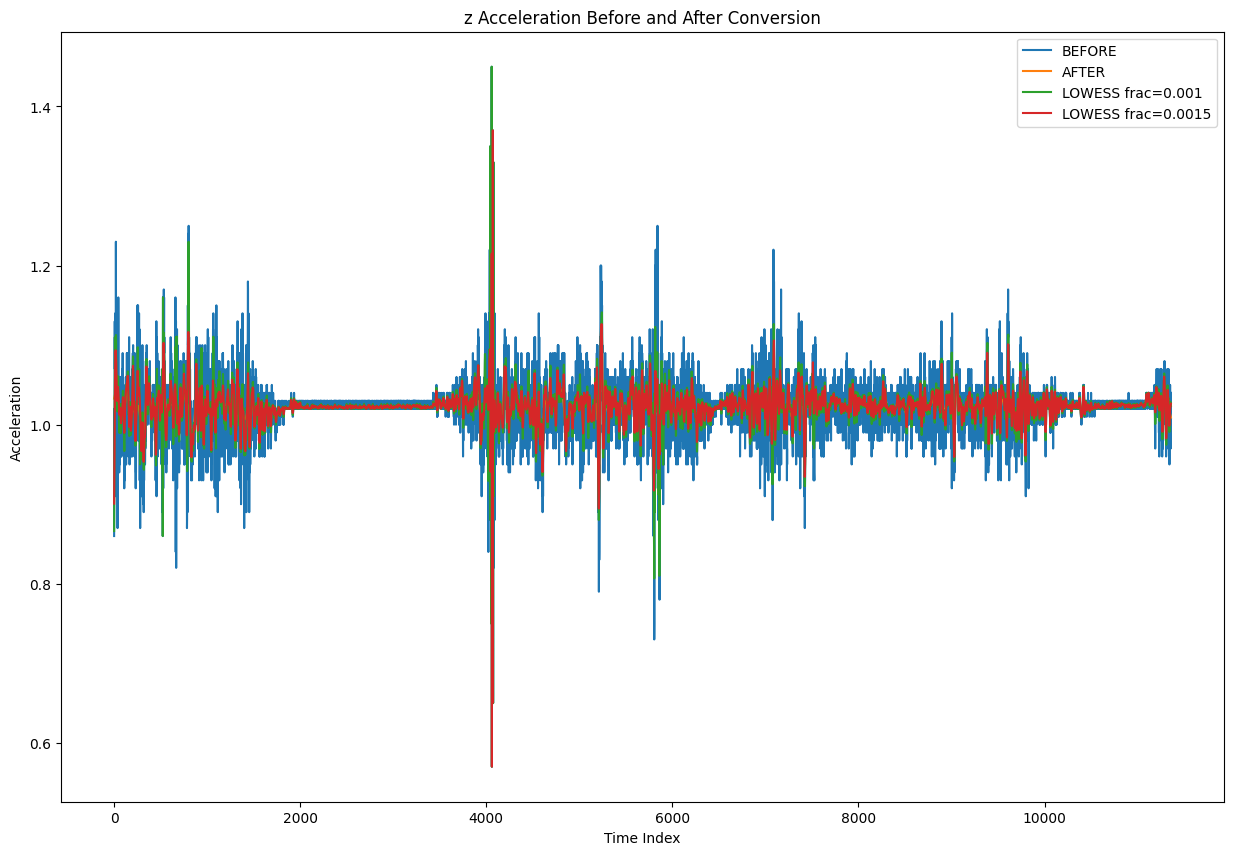

In [22]:
fig, ax = plt.subplots( figsize=(15, 10))
fracs = [0.001, 0.0015]

ax.plot(x, data_before[2], label='BEFORE')
ax.plot(x, data_after[2], label='AFTER')
ax.set_xlabel("Time Index")
ax.set_ylabel("Acceleration")
db = data_before[2]
for frac in fracs:
    db_filter = sm.nonparametric.lowess(db, x, frac=frac, is_sorted=True, return_sorted=False)
    ax.plot(x, db_filter, label=f'LOWESS frac={frac}')
ax.legend()
ax.set_title(titles[2])
plt.show()